In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('student_data.csv')
df=df[1:100]
print(df)

   sex  age address  studytime  failures activities internet  goout  Walc  \
1    F   17       U          2         0         no      yes      3     1   
2    F   15       U          2         3         no      yes      2     3   
3    F   15       U          3         0        yes      yes      2     1   
4    F   16       U          2         0         no       no      2     2   
5    M   16       U          2         0        yes      yes      2     2   
..  ..  ...     ...        ...       ...        ...      ...    ...   ...   
95   F   15       R          4         1        yes      yes      2     1   
96   M   16       R          1         0        yes      yes      3     1   
97   F   16       U          2         0         no       no      5     1   
98   F   16       U          1         0        yes      yes      4     2   
99   F   16       U          3         0         no      yes      5     1   

    health  absences  Maths  Science  Physics  
1        3         4      5

In [ ]:
df['Average']=(df['Maths']+df['Science']+df['Physics'])/3
min_avg=df['Average'].min()
max_avg=df['Average'].max()
print(min_avg)
print(max_avg)

5.0
19.333333333333332


In [ ]:
def performance(Average):
  if Average>17:
    return 'Excellent'
  elif Average>13:
    return 'Good'
  elif Average>9:
    return 'Average'
  else:
    return 'Poor'
df['Performance']=df['Average'].apply(performance)
print(df)

   sex  age address  studytime  failures activities internet  goout  Walc  \
1    F   17       U          2         0         no      yes      3     1   
2    F   15       U          2         3         no      yes      2     3   
3    F   15       U          3         0        yes      yes      2     1   
4    F   16       U          2         0         no       no      2     2   
5    M   16       U          2         0        yes      yes      2     2   
..  ..  ...     ...        ...       ...        ...      ...    ...   ...   
95   F   15       R          4         1        yes      yes      2     1   
96   M   16       R          1         0        yes      yes      3     1   
97   F   16       U          2         0         no       no      5     1   
98   F   16       U          1         0        yes      yes      4     2   
99   F   16       U          3         0         no      yes      5     1   

    health  absences  Maths  Science  Physics    Average Performance  
1   

In [ ]:
df['sex']=df['sex'].map({'M':1,'F':0})
df['activities']=df['activities'].map({'yes':1,'no':0})
df['internet']=df['internet'].map({'yes':1,'no':0})

In [ ]:
print(df)

    sex  age address  studytime  failures  activities  internet  goout  Walc  \
1     0   17       U          2         0           0         1      3     1   
2     0   15       U          2         3           0         1      2     3   
3     0   15       U          3         0           1         1      2     1   
4     0   16       U          2         0           0         0      2     2   
5     1   16       U          2         0           1         1      2     2   
..  ...  ...     ...        ...       ...         ...       ...    ...   ...   
95    0   15       R          4         1           1         1      2     1   
96    1   16       R          1         0           1         1      3     1   
97    0   16       U          2         0           0         0      5     1   
98    0   16       U          1         0           1         1      4     2   
99    0   16       U          3         0           0         1      5     1   

    health  absences  Maths  Science  P

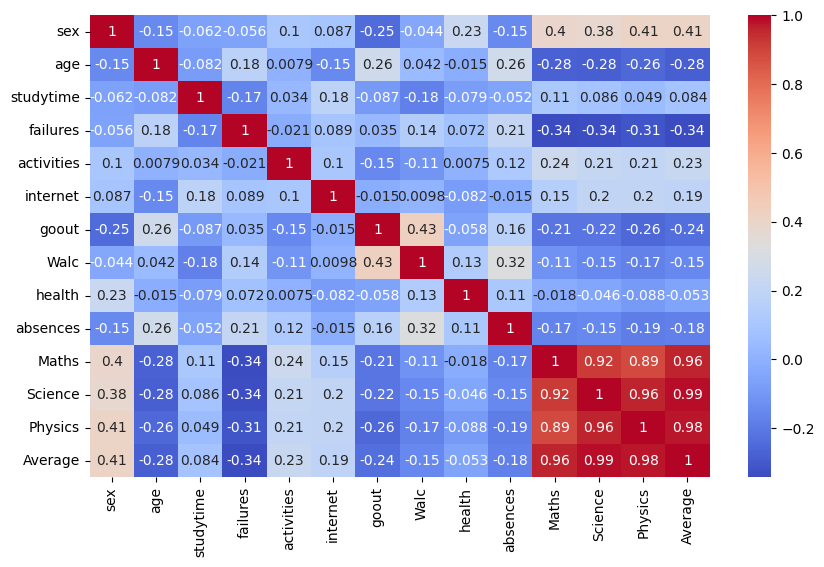

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

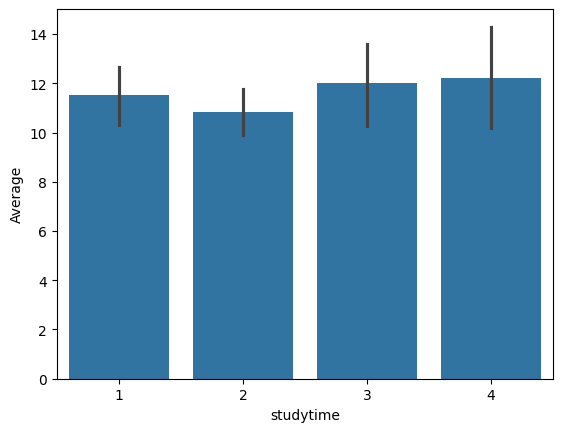

In [ ]:
sns.barplot(x='studytime',y='Average',data=df)
plt.show()

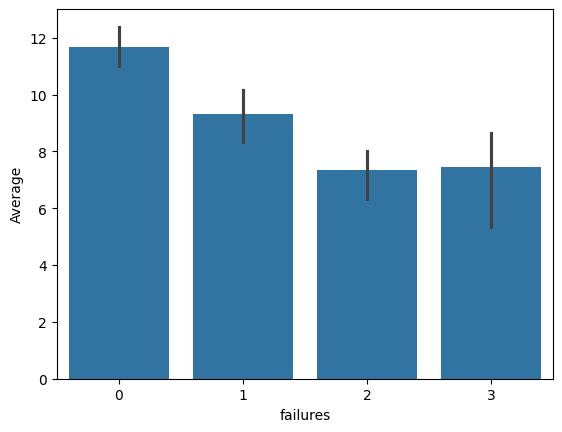

In [ ]:
sns.barplot(x='failures',y='Average',data=df)
plt.show()

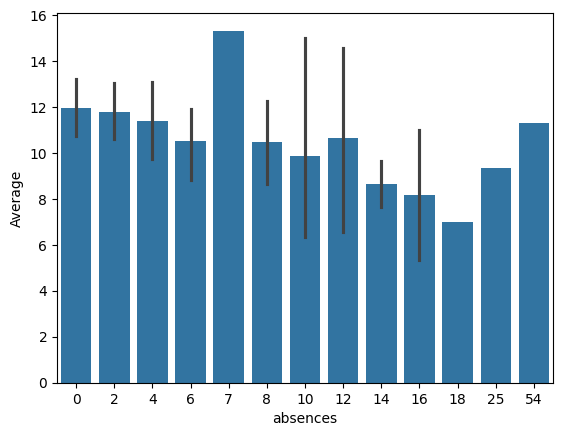

In [20]:
sns.barplot(x='absences',y='Average',data=df)
plt.show()

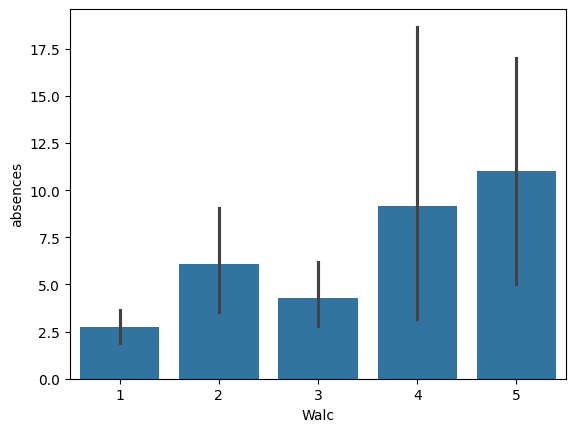

In [22]:
sns.barplot(x='Walc',y='absences',data=df)
plt.show()

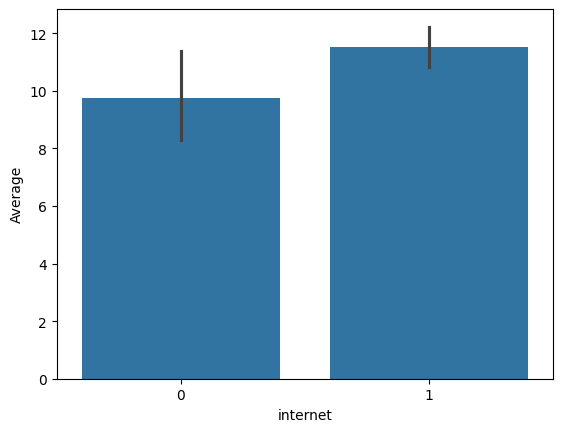

In [23]:
sns.barplot(x='internet',y='Average',data=df)
plt.show()

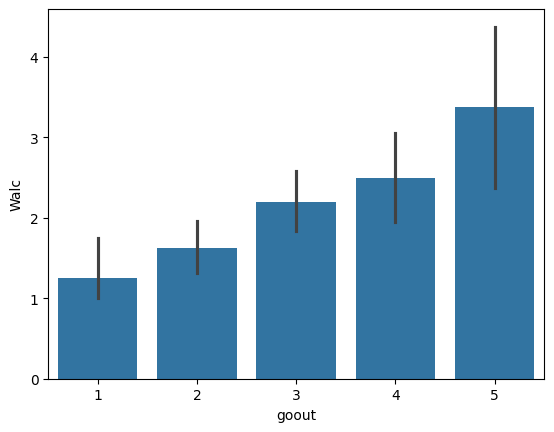

In [24]:
sns.barplot(x='goout',y='Walc',data=df)
plt.show()

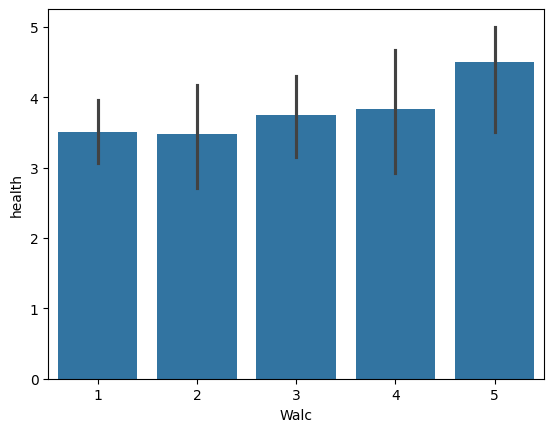

In [26]:
sns.barplot(x='Walc',y='health',data=df)
plt.show()

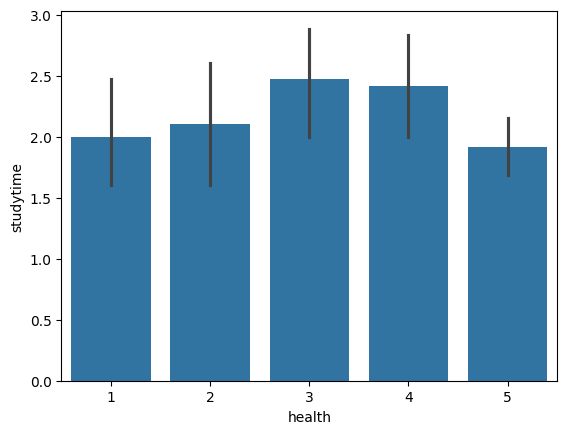

In [27]:
sns.barplot(x='health',y='studytime',data=df)
plt.show()

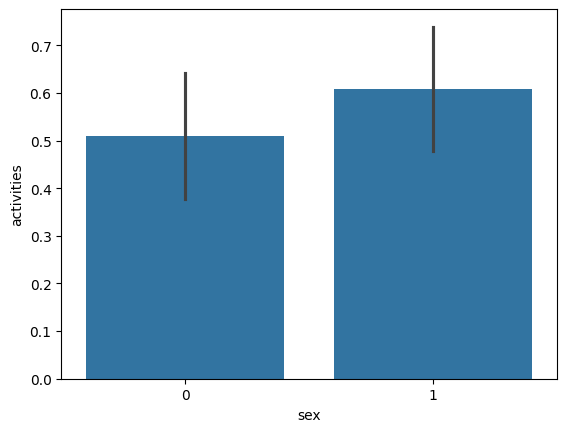

In [28]:
sns.barplot(x='sex',y='activities',data=df)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score


In [34]:
X=df.drop(columns=['address','Maths','Science','Physics','Average','Performance'])
y=df['Average']

In [35]:
X_train,X_test,y_train,y_test=train_test_split (
    X,y,test_size=0.2,random_state=42
)

In [36]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [37]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 2.284567394023665
R2 Score: 0.1877767988348451
